In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/Users/surya/Downloads/WA_Fn-UseC_-Telco-Customer-Churn 2.csv")

In [3]:
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [4]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents.

In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

**Data Cleaning & Manipulation**

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Checking for duplicates based on 'customerID'
duplicate_records = df['customerID'].duplicated().sum()
print(duplicate_records)

0


In [9]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' will convert non-convertible values to NaN
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
#we have 11 missing values in total charges column

In [12]:
#lets see missing records of total charges column
df[np.isnan(df['TotalCharges'])]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

**Given that the Tenure column is 0 for the records where TotalCharges is missing, and since MonthlyCharges is not empty for these records, it seems these customers are new and have not yet been billed beyond the first month. we set TotalCharges equal to MonthlyCharges for these records. This assumes that their first bill might be equivalent to one month of service.**

In [13]:
# Correcting the typo and filling the missing TotalCharges values
df.loc[(df['tenure'] == 0) & (df['TotalCharges'].isnull()), 'TotalCharges'] = df['MonthlyCharges']

# Recheck for any remaining missing values in TotalCharges
remaining_missing_values_corrected = df['TotalCharges'].isnull().sum()
remaining_missing_values_corrected


0

In [14]:
#Standardizing senior citizen variable 
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [15]:
df["InternetService"].describe(include=['object', 'bool'])


count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [16]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.798992
std      24.559481       30.090047   2266.730170
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

**Pre processing**

**Feature Scaling : standardize categorical variables to simplify the categories and potentially improve model performance by reducing sparsity in the dataset**

In [17]:
# Review the unique values in the 'MultipleLines' column
print(df['MultipleLines'].unique())

# Standardize by merging 'No phone service' with 'No'
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Verify the changes
print(df['MultipleLines'].unique())

['No phone service' 'No' 'Yes']
['No' 'Yes']


In [18]:
# List of columns to standardize
columns_to_standardize = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Review the unique values before standardization
for column in columns_to_standardize:
    print(f"Unique values in {column} before: {df[column].unique()}")

# Standardize by merging 'No internet service' with 'No'
for column in columns_to_standardize:
    df[column] = df[column].replace({'No internet service': 'No'})

# Verify the changes
for column in columns_to_standardize:
    print(f"Unique values in {column} after: {df[column].unique()}")


Unique values in OnlineSecurity before: ['No' 'Yes' 'No internet service']
Unique values in DeviceProtection before: ['No' 'Yes' 'No internet service']
Unique values in TechSupport before: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV before: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies before: ['No' 'Yes' 'No internet service']
Unique values in OnlineSecurity after: ['No' 'Yes']
Unique values in DeviceProtection after: ['No' 'Yes']
Unique values in TechSupport after: ['No' 'Yes']
Unique values in StreamingTV after: ['No' 'Yes']
Unique values in StreamingMovies after: ['No' 'Yes']


In [19]:
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [20]:
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head(10)


tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0       1           29.85         29.85      0              1            0   
1      34           56.95       1889.50      0              0            1   
2       2           53.85        108.15      1              0            1   
3      45           42.30       1840.75      0              0            1   
4       2           70.70        151.65      1              1            0   
5       8           99.65        820.50      1              1            0   
6      22           89.10       1949.40      0              0            1   
7      10           29.75        301.90      0              1            0   
8      28          104.80       3046.05      1              1            0   
9      62           56.15       3487.95      0              0            1   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  ...  \
0                 1                  0           0            1  ...   
1                 1                  0           1            0  ...   
2                 1                  0           1            0  ...   
3                 1                  0           1            0  ...   
4                 1                  0           1            0  ...   
5                 1                  0           1            0  ...   
6                 1                  0           1            0  ...   
7                 1                  0           1            0  ...   
8                 1                  0           0            1  ...   
9                 1                  0           1            0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   
5                    1                        1                  0   
6                    0                        1                  0   
7                    0                        1                  0   
8                    1                        1                  0   
9                    0                        0                  1   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   
5                  0                    0                     1   
6                  0                    0                     1   
7                  0                    1                     0   
8                  0                    0                     1   
9                  0                    1                     0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
9                                        1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                              

In [21]:
df.shape

(7043, 21)

**Remove Customer IDs**: unique id which  doesn't provide predictive power for the model.


**Converting the Predictor Variable**: Converts the target variable 'Churn' from categorical ('Yes', 'No') to a binary numeric format (1, 0), which is necessary for binary classification models.

**One-Hot Encoding of Categorical Variables**:
df_dummies = pd.get_dummies(df2): This is the one-hot encoding step. It converts all remaining categorical variables in df2 into dummy/indicator variables. 

In [22]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_dummies[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.798992
std      24.559481       30.090047   2266.730170
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

<Axes: >

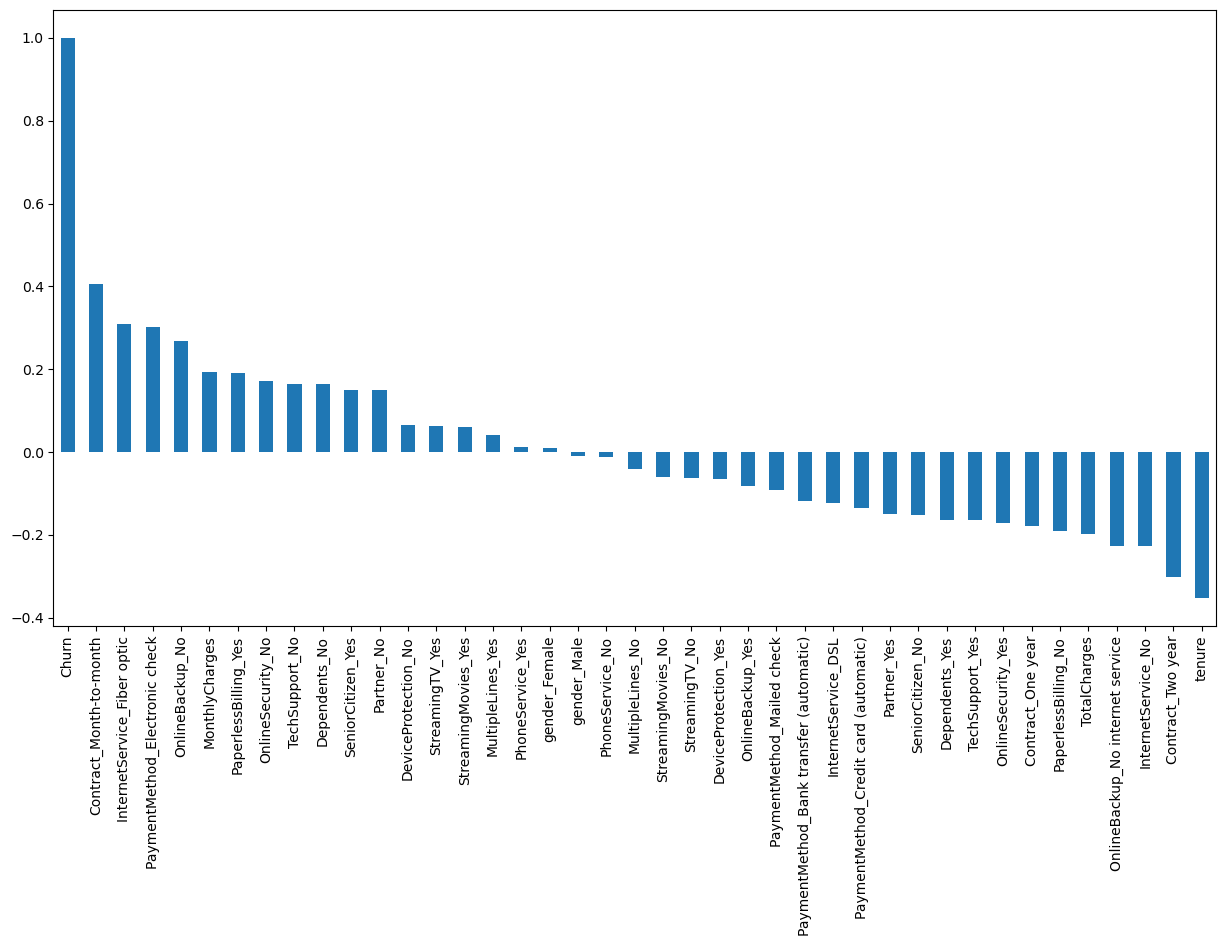

In [23]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


**Exploratory Data Analysis**

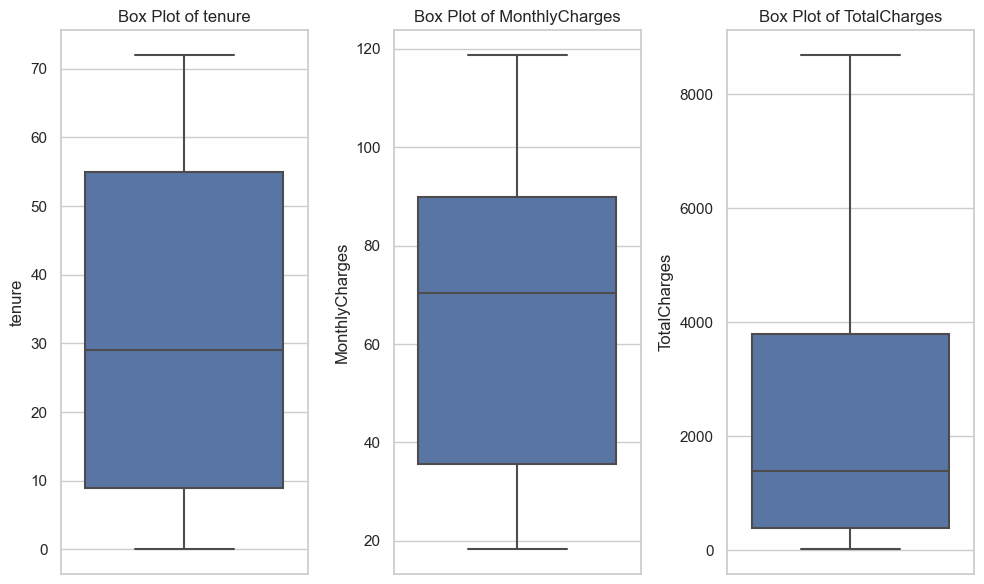

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visibility
sns.set(style="whitegrid")

# Create a figure to display box plots
plt.figure(figsize=(10, 6))

# Create a list of columns to check for outliers
columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create box plots for each column
for i, column in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


The box plots show no outliers for `tenure` and `MonthlyCharges`, but there are several potential outliers in the `TotalCharges` feature, indicating some customers with exceptionally high charges.**customers with very high TotalCharges could be long-standing customers with high lifetime value**

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.



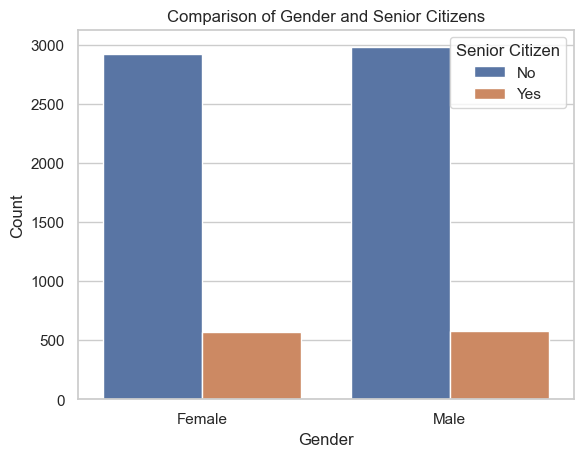

In [25]:
# Create a count plot
sns.countplot(x='gender', hue='SeniorCitizen', data=df)

# Adding labels and title for clarity
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Gender and Senior Citizens')
plt.legend(title='Senior Citizen', labels=['No', 'Yes'])

# Show the plot
plt.show()

**Gender Distribution** - About 50.5% are male and 49.5% are female.
**Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

/var/folders/j7/t594hs655zzf0dkp2sm786kr0000gn/T/ipykernel_15483/2815485672.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
/var/folders/j7/t594hs655zzf0dkp2sm786kr0000gn/T/ipykernel_15483/2815485672.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

Text(0.5, 1.0, 'Two Year Contract')

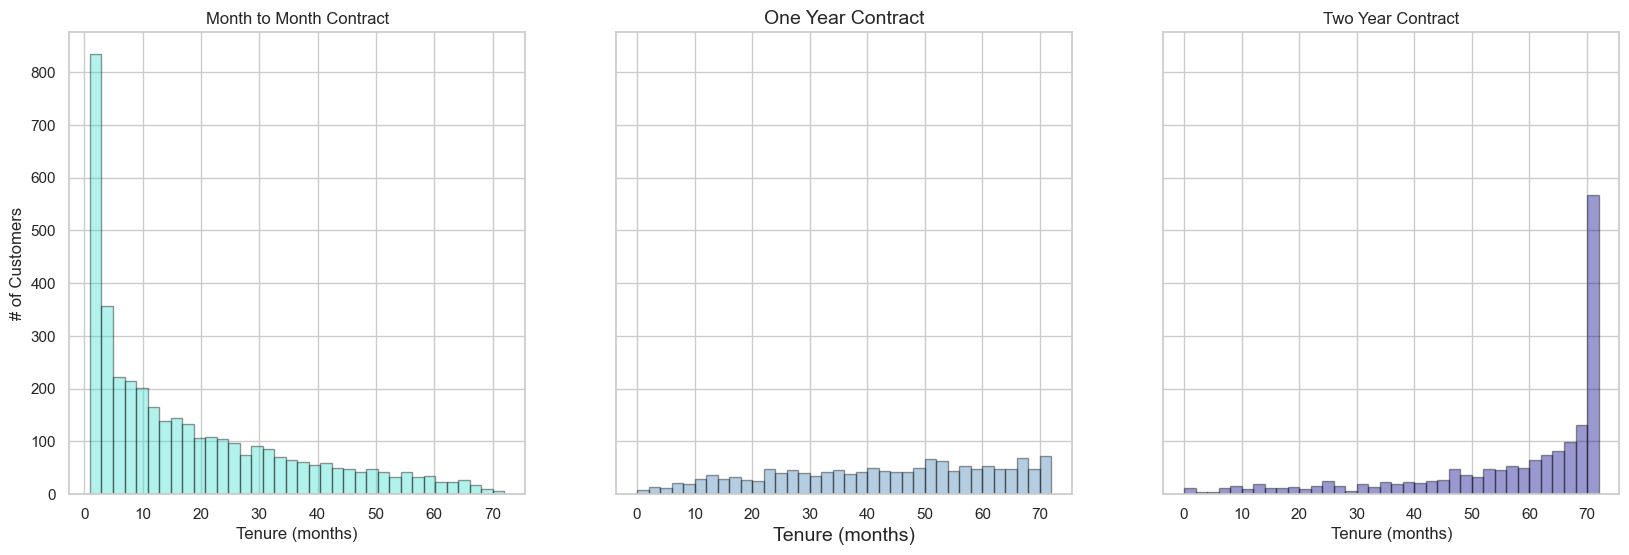

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                  hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

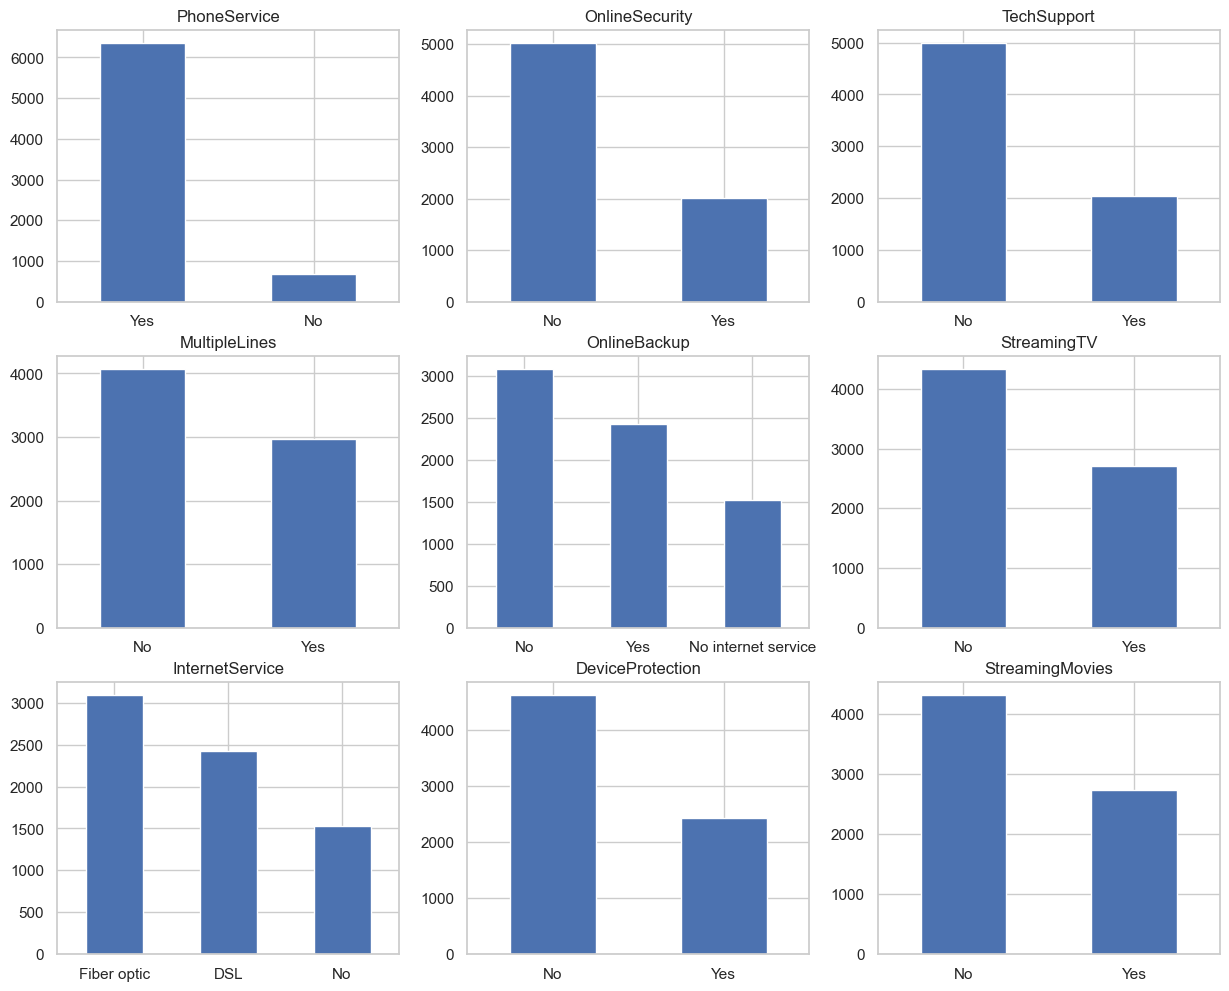

In [27]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

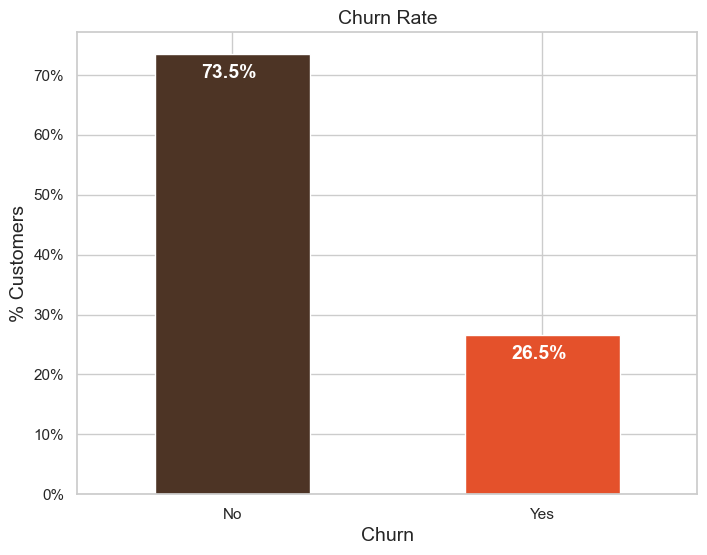

In [28]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            color='white',
            weight='bold',
            size=14)  # Keep only this line for setting font size


In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Bivariate Analysis

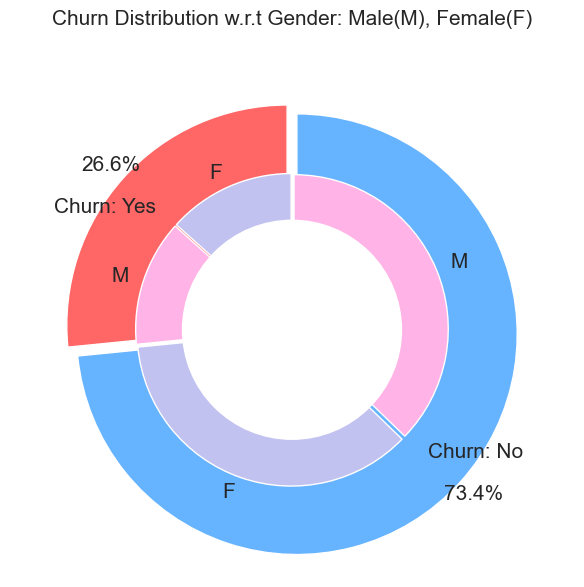

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn: No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3, 0.3) 
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}
#Plot
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8, colors=colors, 
        startangle=90, frame=True, explode=explode, radius=10, textprops=textprops, counterclock=True)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, 
        radius=7, textprops=textprops, counterclock=True)
# Draw circle
centre_circle = plt.Circle((0,0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()


There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [30]:
import plotly.express as px

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [31]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()


In [32]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



#Customers without dependents are more likely to churn

In [33]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



#Customers that doesn't have partners are more likely to churn

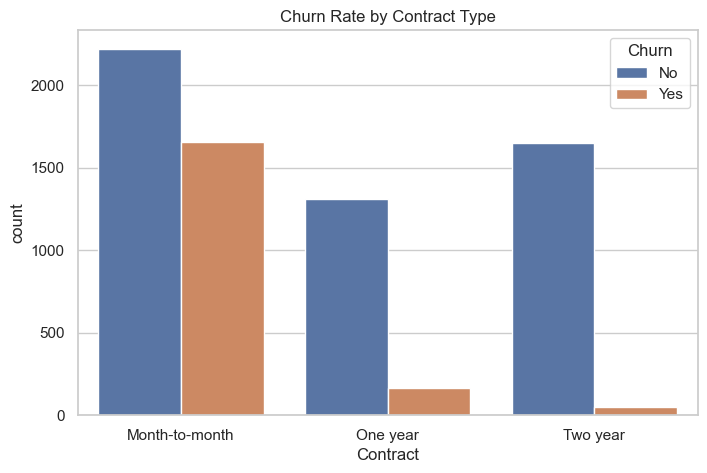

/var/folders/j7/t594hs655zzf0dkp2sm786kr0000gn/T/ipykernel_15483/685134436.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



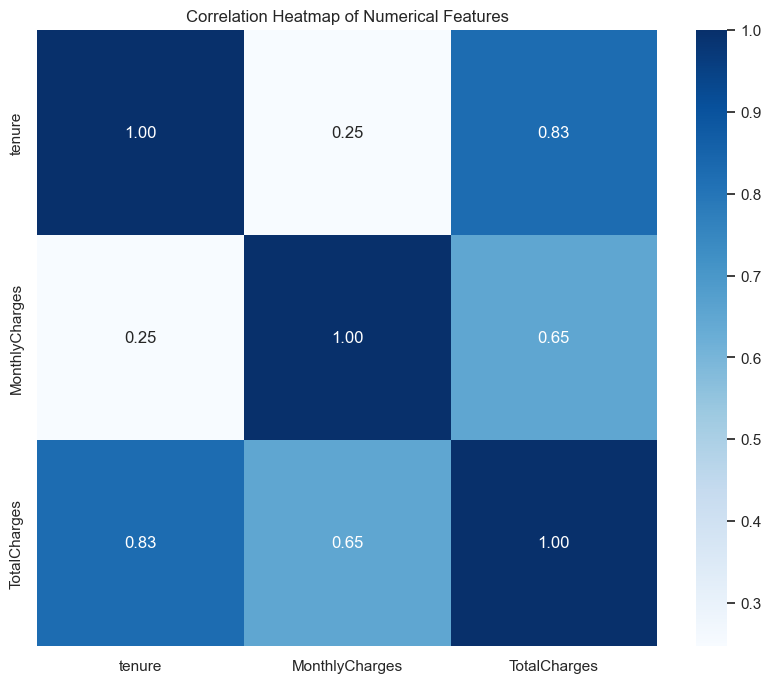

In [34]:

# EDA - Bivariate Analysis - Churn Rate by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

# EDA - Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Feature Engineering**

In [35]:
# Create a new feature 'HighTenureHighMonthly' where both 'tenure' and 'MonthlyCharges' are above the median
df['HighTenureHighMonthly'] = ((df['tenure'] > df['tenure'].median()) & (df['MonthlyCharges'] > df['MonthlyCharges'].median())).astype(int)
df.head(5)

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL             No  ...          No          No   
1            No             DSL            Yes  ...          No          No   
2            No             DSL            Yes  ...          No          No   
3            No             DSL            Yes  ...         Yes          No   
4            No     Fiber optic             No  ...          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  MonthlyCharges TotalCharges  Churn  HighTenureHighMonthly  
0          29.85        29.85     No                      0  
1          56.95      1889.50     No                      0  
2          53.85       108.15    Yes                      0  
3          42.30      1840.75     No                      0  
4          70.70       151.65    Yes                      0  

[5 rows x 22 columns]

The idea is that this group of customers may exhibit different churn behavior compared to others. For instance, customers who have been with the company for a long time and pay more than the average monthly fee might be more loyal or have a higher satisfaction level, potentially making them less likely to churn. Conversely, they could also be more at risk if they find a better offer elsewhere, considering they might save more money.

In [36]:
# Filter the DataFrame for records where 'HighTenureHighMonthly' is not 0
high_tenure_high_monthly_records = df[df['HighTenureHighMonthly'] != 0]

# Display the records
print(high_tenure_high_monthly_records)


      customerID  gender SeniorCitizen Partner Dependents  tenure  \
12    8091-TTVAX    Male            No     Yes         No      58   
13    0280-XJGEX    Male            No      No         No      49   
15    3655-SNQYZ  Female            No     Yes        Yes      69   
17    9959-WOFKT    Male            No      No        Yes      71   
26    6467-CHFZW    Male            No     Yes        Yes      47   
...          ...     ...           ...     ...        ...     ...   
7023  1035-IPQPU  Female           Yes     Yes         No      63   
7024  7398-LXGYX    Male            No     Yes         No      44   
7034  0639-TSIQW  Female            No      No         No      67   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
12            Yes           Yes     Fiber optic             No  ...   
13            Yes           Y

In [37]:
# Convert 'Partner' and 'Dependents' to binary values where 'Yes' is 1 and 'No' is 0
df['PartnerBinary'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['DependentsBinary'] = df['Dependents'].map({'Yes': 1, 'No': 0})

# Create 'SoloCustomerIndicator' where both 'PartnerBinary' and 'DependentsBinary' are 0
df['SoloCustomerIndicator'] = ((df['PartnerBinary'] == 0) & (df['DependentsBinary'] == 0)).astype(int)


Feature: SoloCustomerIndicator
Definition: A binary feature where 1 indicates that the customer has neither partners nor dependents, and 0 otherwise.
Rationale: Combining these two factors into one could provide a clearer signal to the model regarding customers who may feel less attached to the service due to fewer family commitments.


PartnerBinary and DependentsBinary: These intermediate binary features make it easier to calculate the SoloCustomerIndicator.
SoloCustomerIndicator: This feature is 1 if both Partner and Dependents are 'No' (converted to 0 in binary terms), suggesting the customer has no partner and no dependents, potentially indicating a higher propensity to churn based on your EDA findings.

In [38]:
df_dummies.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0       1           29.85         29.85      0              1            0   
1      34           56.95       1889.50      0              0            1   
2       2           53.85        108.15      1              0            1   
3      45           42.30       1840.75      0              0            1   
4       2           70.70        151.65      1              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  ...  \
0                 1                  0           0            1  ...   
1                 1                  0           1            0  ...   
2                 1                  0           1            0  ...   
3                 1                  0           1            0  ...   
4                 1                  0           1            0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 41 columns]

In [39]:

#df_dummies = pd.get_dummies(df.drop('Churn', axis=1))
#df_dummies['HighTenureHighMonthly'] = df['HighTenureHighMonthly']
#df_dummies['SoloCustomerIndicator'] = df['SoloCustomerIndicator']


**ML Model**

In [40]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns=['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=features)

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)


In [41]:
from sklearn.linear_model import LogisticRegression

# Create and fit the model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Get feature coefficients
feature_coefficients = model_lr.coef_[0]

# Map feature names to coefficients
feature_coefficients_dict = dict(zip(X_train.columns, feature_coefficients))

# Sort feature coefficients in descending order
sorted_feature_coefficients = sorted(feature_coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature coefficients
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")


tenure: -3.4311733018328576
TotalCharges: 1.438171004194951
InternetService_Fiber optic: 0.6746473738801247
Contract_Month-to-month: 0.6234665727865415
Contract_Two year: -0.5621410134871188
InternetService_No: -0.353765448228059
OnlineBackup_No internet service: -0.353765448228059
PhoneService_Yes: -0.32690467603084716
PhoneService_No: 0.3257155373609285
InternetService_DSL: -0.3220710643219039
OnlineBackup_No: 0.28834172025462734
PaymentMethod_Electronic check: 0.27380681882087726
PaymentMethod_Credit card (automatic): -0.22990899872526735
OnlineSecurity_Yes: -0.19340113371510684
OnlineSecurity_No: 0.19221199504526099
PaperlessBilling_No: -0.17051722839256092
PaperlessBilling_Yes: 0.16932808972276164
TechSupport_Yes: -0.15208222091609933
TechSupport_No: 0.15089308224631293
SeniorCitizen_No: -0.11625720780746598
MultipleLines_No: -0.11530593674320513
SeniorCitizen_Yes: 0.11506806913758814
MultipleLines_Yes: 0.11411679807337106
Dependents_Yes: -0.1029246715670524
Dependents_No: 0.10173

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create and fit the logistic regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predict on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy, precision, recall, and F1-score
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nModel Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

# Optionally, print classification report for more detailed metrics
print("\nClassification Report_LogisticRegression:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[934  92]
 [188 195]]

Model Metrics:
Accuracy: 0.80
Precision: 0.68
Recall: 0.51
F1-score: 0.58

Classification Report_LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.68      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409




These metrics provide insight into the model's performance in predicting customer churn:
- The model correctly predicted 1381 instances of non-churn (0) and 302 instances of churn (1).
- However, it misclassified 259 instances of non-churn as churn and 171 instances of churn as non-churn.
- The model achieved an accuracy of 80%, indicating the proportion of correctly classified instances among all instances.
- Precision (0.64) measures the proportion of true positive predictions among all positive predictions.
- Recall (0.54) measures the proportion of true positive predictions among all actual positive instances.
- F1-score (0.58) is the harmonic mean of precision and recall, providing a balance between the two metrics.




In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score  # Import accuracy_score


# Initialize the Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt", # Change "auto" to "sqrt"
                                  max_leaf_nodes=30)

# Train the Random Forest classifier
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_test)  # Use accuracy_score function
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction_test)
print("Confusion Matrix:")
print(conf_matrix)


# Calculate accuracy, precision, recall, and F1-score
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nModel Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Accuracy: 0.801277501774308
Confusion Matrix:
[[954  72]
 [208 175]]

Model Metrics:
Accuracy: 0.80
Precision: 0.71
Recall: 0.46
F1-score: 0.56


<Axes: >

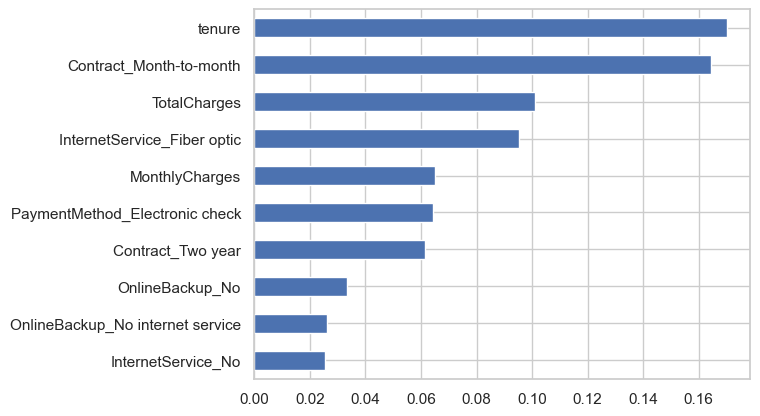

In [44]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations:

From random forest algorithm monthly tenure, contract and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the Support Vector Machine classifier
model_svm = SVC(kernel='linear', random_state=42)  # You can specify other kernels like 'rbf', 'poly', etc.

# Train the SVM classifier
model_svm.fit(X_train, y_train)

# Make predictions
prediction_test = model_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_test)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction_test)
print("Confusion Matrix:")
print(conf_matrix)


# Calculate accuracy, precision, recall, and F1-score
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nModel Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Accuracy: 0.794889992902768
Confusion Matrix:
[[932  94]
 [195 188]]

Model Metrics:
Accuracy: 0.79
Precision: 0.67
Recall: 0.49
F1-score: 0.57


In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize the AdaBoost classifier
model_adaboost = AdaBoostClassifier()

# Train the AdaBoost classifier
model_adaboost.fit(X_train, y_train)

# Make predictions
preds = model_adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)



# Calculate accuracy, precision, recall, and F1-score
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nModel Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

Accuracy: 0.7955997161107168

Model Metrics:
Accuracy: 0.79
Precision: 0.67
Recall: 0.49
F1-score: 0.57


In [47]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume df is your DataFrame and 'Churn' is the target feature
X = df_dummies.drop('Churn', axis=1)  # Features (make sure to preprocess these beforehand)
y = df_dummies['Churn']               # Target variable

# New 80:20 split for the dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the classifier to the new training data
xgb_clf.fit(X_train_new, y_train_new)

# Predict the labels of the new test set
y_pred_new = xgb_clf.predict(X_test_new)

# Evaluate the accuracy of the classifier on the new test set
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy on the 80:20 split: {accuracy_new * 100:.2f}%")


# Calculate accuracy, precision, recall, and F1-score
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nModel Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Accuracy on the 80:20 split: 79.06%

Model Metrics:
Accuracy: 0.79
Precision: 0.67
Recall: 0.49
F1-score: 0.57


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression
print("\nLogistic Regression:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_lr.predict(X_test)))
print("Model Metrics:")
print(classification_report(y_test, model_lr.predict(X_test)))

# Random Forest
print("\nRandom Forest:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_rf.predict(X_test)))
print("Model Metrics:")
print(classification_report(y_test, model_rf.predict(X_test)))

# SVM
print("\nSVM:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_svm.predict(X_test)))
print("Model Metrics:")
print(classification_report(y_test, model_svm.predict(X_test)))

# AdaBoost
print("\nAdaBoost:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_adaboost.predict(X_test)))
print("Model Metrics:")
print(classification_report(y_test, model_adaboost.predict(X_test)))

# XGBoost
print("\nXGBoost:")
print(f"Accuracy on the 80:20 split: {accuracy_score(y_test_new, y_pred_new) * 100:.2f}%")
print("Model Metrics:")
print(classification_report(y_test_new, y_pred_new))



Logistic Regression:
Confusion Matrix:
[[934  92]
 [188 195]]
Model Metrics:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.68      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Random Forest:
Confusion Matrix:
[[954  72]
 [208 175]]
Model Metrics:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1026
           1       0.71      0.46      0.56       383

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409


SVM:
Confusion Matrix:
[[932  94]
 [195 188]]
Model Metrics:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.67  

Based on the provided metrics, the Logistic Regression model seems to perform the best for customer churn prediction. Here's why:

Accuracy: The Logistic Regression model has an accuracy of 80%, which is the highest among the compared models.
Precision: The precision for predicting churn (class 1) is 68%, which means when it predicts churn, it's correct 68% of the time. This is higher than the precision of other models.
Recall: While the recall for predicting churn is not the highest (51%), it's still relatively good. Recall measures how many actual churn instances were correctly predicted as churn by the model.
F1-score: The F1-score, which is the harmonic mean of precision and recall, is also relatively high at 58%.

    
    
While the Random Forest model has comparable accuracy to the Logistic Regression model, its lower recall suggests that it may miss more instances of actual churn compared to the Logistic Regression model.

**Model Cross validation**

In [55]:
from sklearn.model_selection import cross_val_score

# Logistic Regression with k-fold cross-validation
lr_cv_scores = cross_val_score(model_lr, X, y, cv=5)
print("Logistic Regression CV Scores:", lr_cv_scores)
print("Mean CV Accuracy:", lr_cv_scores.mean())

# Random Forest with OOB score
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

print("Random Forest OOB Score:", model_rf.oob_score_)


Logistic Regression CV Scores: [0.80198722 0.80695529 0.78992193 0.8125     0.8046875 ]
Mean CV Accuracy: 0.8032103885734564
Random Forest OOB Score: 0.8022719204827831


The cross-validation scores for Logistic Regression are fairly consistent across the folds, ranging from 0.789 to 0.813, with a mean accuracy of approximately 0.803.

On the other hand, the Random Forest model has an out-of-bag (OOB) score of approximately 0.802, which is quite similar to the Logistic Regression mean accuracy obtained from cross-validation.